In [1]:
#import app
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from google.colab import files
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
uploaded = files.upload()

Saving cover_data.csv to cover_data.csv


In [ ]:
dataset = pd.read_csv('cover_data.csv')

In [ ]:
features = dataset.iloc[:, :54]
labels = dataset.iloc[:, -1]

In [ ]:
X_train, X_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state = 42)

In [ ]:
numeric_features = features.select_dtypes(include=['float64','int64']).columns.tolist()

In [ ]:
ct = ColumnTransformer(transformers=[('standardize', StandardScaler(), numeric_features)], remainder='passthrough')

In [ ]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [ ]:
le = LabelEncoder()

In [ ]:
labels_train = le.fit_transform(labels_train.astype(str))
labels_test = le.transform(labels_test.astype(str))
labels_train = tf.keras.utils.to_categorical(labels_train)
labels_test = tf.keras.utils.to_categorical(labels_test)

In [ ]:
num_unique_values = dataset['class'].nunique()

model = Sequential(name="forest_classification_nn")
num_of_features = features.shape[1]
input = layers.InputLayer(shape=(num_of_features,))
model.add(input)
model.add(Dense(512, activation='relu'))
model.add(Dense(164, activation='relu'))
model.add(Dense(num_unique_values, activation='softmax'))
Sequential.summary(model)
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

Model: "forest_classification_nn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 512)                 │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 164)                 │          84,132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 7)                   │           1,155 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,447 (443.15 KB)

 Trainable params: 113,447 (443.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(X_train_scaled, labels_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0503 - mae: 0.0992 - val_loss: 0.0359 - val_mae: 0.0703
Epoch 2/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0346 - mae: 0.0667 - val_loss: 0.0309 - val_mae: 0.0597
Epoch 3/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0297 - mae: 0.0558 - val_loss: 0.0281 - val_mae: 0.0519
Epoch 4/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0274 - mae: 0.0501 - val_loss: 0.0271 - val_mae: 0.0485
Epoch 5/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 0.0256 - mae: 0.0460 - val_loss: 0.0254 - val_mae: 0.0437
Epoch 6/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0245 - mae: 0.0435 - val_loss: 0.0243 - val_mae: 0.0415
Epoch 7/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 0.0232 - mae: 0.0404 - val_loss: 0.0240 - val_mae: 0.0403
Epoch 8/100
9732/9732 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.0226 - mae: 0.0389 - val_loss: 0.0231 - val_mae: 0.0386
Epoch 9/100
9732/9732 ━━

In [ ]:
res_mse, res_mae = model.evaluate(X_test_scaled, labels_test, verbose=0)
predicted_values = model.predict(X_test_scaled)

5992/5992 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [ ]:
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

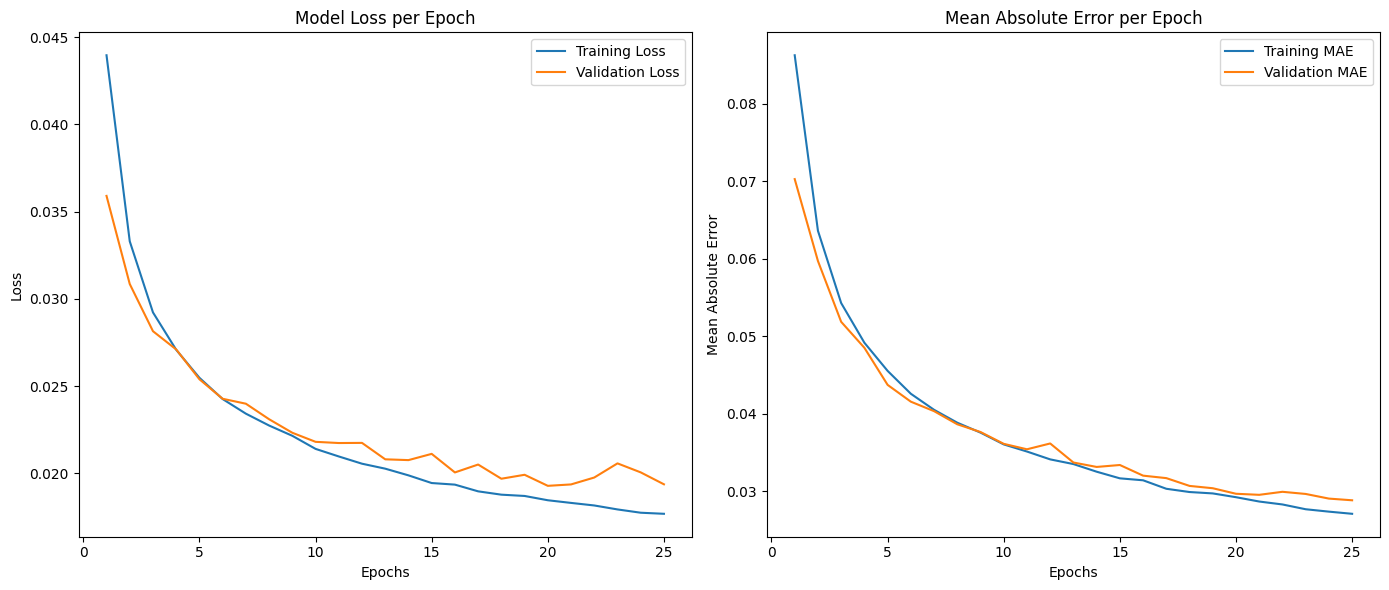

In [ ]:
# Create a figure object
fig = plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Adjust layout and save the figure
plt.tight_layout()

In [ ]:
#predicted_values = np.argmax(predicted_values, axis=1)
print(predicted_values.shape)
print(labels_test.shape)
y_true = np.argmax(labels_test, axis=1)
print(classification_report(y_true, predicted_values))

(191734,)
(191734, 7)
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     69978
           1       0.91      0.95      0.93     93523
           2       0.92      0.88      0.90     11696
           3       0.83      0.71      0.77       875
           4       0.81      0.67      0.74      3225
           5       0.79      0.83      0.81      5762
           6       0.89      0.89      0.89      6675

    accuracy                           0.91    191734
   macro avg       0.87      0.83      0.85    191734
weighted avg       0.91      0.91      0.91    191734

